#**Install relevant packages**

In [1]:
%%capture
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

#**Import packages**

In [2]:
%%capture
from statsbombpy import sb
import pandas as pd
import numpy as np
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

#**Import API's**

In [3]:
#Call Statsbombpy API
free_comps = sb.competitions()
#Print a list of free competitions
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,None,None,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,None,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,315,Europe,UEFA Women's Euro,female,False,True,2025,2025-07-28T14:19:20.467348,2025-07-29T16:03:07.355174,2025-07-29T16:03:07.355174,2025-07-28T14:19:20.467348
72,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
73,72,107,International,Women's World Cup,female,False,True,2023,2025-07-14T10:07:06.620906,2025-07-14T10:10:27.224586,2025-07-14T10:10:27.224586,2025-07-14T10:07:06.620906


In [4]:
#call the statsbombpy API to get a list of matches for a given competition
#Euro 2024 competition id, season id
#competition_id=55, season_id=282
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

row_count = len(euro_2024_matches)

row_count

51

In [5]:
#create a variable for the team you want to look into
team="England"

#filter for only matches that the focus team played in
matches_df = euro_2024_matches[(euro_2024_matches['home_team'] == team)|(euro_2024_matches['away_team'] == team)]

#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)

In [6]:
#create a variable containing the first match id in the data frame
latest_match_id = matches_df.match_id.iloc[0]

#latest_match_id=3943043

In [7]:
#call the statsbombpy events API to bring in the event data for the match
events_df = sb.events(match_id=latest_match_id)


events_df.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [8]:
#print a list of columns available in the event data
events_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

#**Preprocessing**

In [9]:
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

In [10]:
print(events_df['pass_outcome'].unique())
print(events_df['duel_outcome'].unique())
print(events_df['duel_type'].unique())
print(events_df['dribble_outcome'].unique())
print(events_df['position'].unique())
print(events_df['possession'].unique())

[nan 'Out' 'Incomplete' 'Unknown' 'Pass Offside']
[nan 'Won' 'Success In Play' 'Lost Out' 'Lost In Play' 'Success Out']
[nan 'Tackle' 'Aerial Lost']
[nan 'Incomplete' 'Complete']
[nan 'Right Defensive Midfield' 'Goalkeeper' 'Right Center Back'
 'Right Back' 'Center Forward' 'Center Attacking Midfield' 'Left Wing'
 'Left Center Back' 'Left Back' 'Left Defensive Midfield' 'Right Wing'
 'Right Center Midfield' 'Center Defensive Midfield' 'Left Center Forward'
 'Right Center Forward']
[  1  79   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  72  73  74
  75  77  78  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 117 119 120 121 122 123 124 125 126 127 128 129 130 132 133
 13

In [11]:
events_df.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,772,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,772,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#separate the period
sel_period = 1

df = events_df[events_df['period'] == sel_period].copy()

#sort the DataFrame by timestamp in descending order
fp = df.sort_values(by='timestamp', ascending=True)

fp.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,772,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,772,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.340,Pass,NaN,60.0,40.0,25.4,38.8,NaN,NaN


#**Player & Team xG**

In [13]:
# 페널티 제외
df1 = fp[fp['shot_type'] != 'Penalty'].copy()

# --- 선수별 xG 합계 ---
p_xg = df1.groupby('player')['shot_statsbomb_xg'].sum().round(2)

# --- 선수별 슈팅 횟수 (결측이 아닌 shot_outcome만 카운트) ---
p_shots = df1[df1['shot_outcome'].notna()].groupby('player').size()

# --- 두 결과를 하나로 합치기 ---
p_stats = pd.concat([p_xg, p_shots], axis=1)
p_stats.columns = ['xG_sum', 'Shots']
p_stats = p_stats.sort_values('xG_sum', ascending=False)

# --- 팀별 xG ---
t_xg = df1.groupby('team')['shot_statsbomb_xg'].sum().round(2)

# --- 출력 ---
print(f'Player & Team xG in {sel_period} Period')
print('-----------------------------------------------')
print(p_stats.head(12))
print('-----------------------------------------------')
print(t_xg)


Player & Team xG in 1 Period
-----------------------------------------------
                              xG_sum  Shots
player                                     
Phil Foden                      0.18    1.0
Robin Aime Robert Le Normand    0.12    1.0
Álvaro Borja Morata Martín      0.08    1.0
Nicholas Williams Arthuer       0.07    1.0
Declan Rice                     0.05    1.0
Fabián Ruiz Peña                0.05    1.0
Harry Kane                      0.05    1.0
Daniel Olmo Carvajal            0.03    1.0
Aymeric Laporte                 0.00    NaN
Bukayo Saka                     0.00    NaN
Daniel Carvajal Ramos           0.00    NaN
John Stones                     0.00    NaN
-----------------------------------------------
team
England    0.28
Spain      0.34
Name: shot_statsbomb_xg, dtype: float64


#**England‘s Passsing Map**

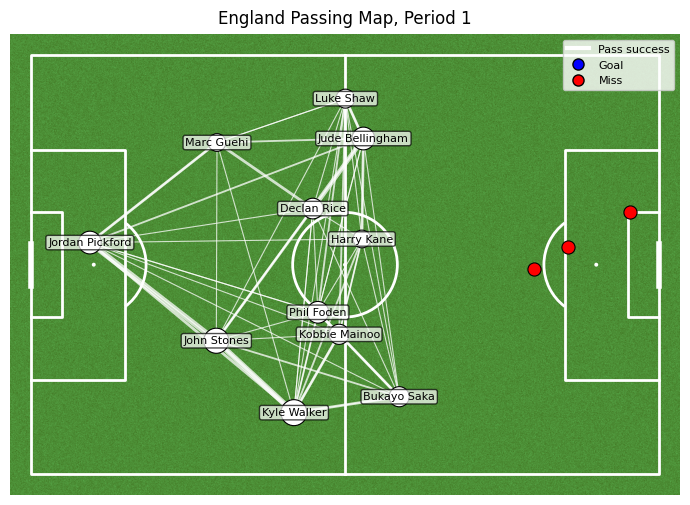

<Figure size 640x480 with 0 Axes>

In [14]:
TEAM_NAME = 'England'
TEAM_COLOR = 'white' #darkred or white

# --- 데이터 전처리 ---
df = fp.copy()

# 좌표와 id만 숫자로, outcome들은 문자열 그대로 두기
num_cols = ['x','y','pass_end_x','pass_end_y','player_id','pass_recipient_id','period']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 성공 패스만, StatsBomb에서는 pass_outcome이 NaN이면 성공
team_passes = (
    df[(df['team'] == TEAM_NAME)
       & (df['type'] == 'Pass')
       & (df['pass_outcome'].isna())]
    .dropna(subset=['x','y','pass_end_x','pass_end_y','player_id','pass_recipient_id'])
)

# 슛, 골 표기, shot_outcome으로 골 판단
team_shots = df[(df['team'] == TEAM_NAME) & (df['type'] == 'Shot')].copy()
team_shots['sx'] = team_shots['x']
team_shots['sy'] = team_shots['y']

id_to_name = (df[['player_id','player']].dropna()
              .drop_duplicates('player_id')
              .set_index('player_id')['player'].to_dict())

def make_network(team_df, min_edge_count=1):
    # 엣지, 패스 송수신 쌍과 횟수
    edges = (team_df
             .dropna(subset=['player_id','pass_recipient_id'])
             .groupby(['player_id','pass_recipient_id']).size()
             .reset_index(name='count'))
    edges = edges[edges['count'] >= min_edge_count].copy()

    # 노드, 평균 위치
    out_pos = (team_df.groupby('player_id')[['x','y']]
               .mean().rename(columns={'x':'x_out','y':'y_out'}))
    in_pos  = (team_df.groupby('pass_recipient_id')[['pass_end_x','pass_end_y']]
               .mean().rename(columns={'pass_end_x':'x_in','pass_end_y':'y_in'}))

    node_ids = pd.Index(out_pos.index).union(pd.Index(in_pos.index))
    nodes = (pd.DataFrame(index=node_ids)
             .join(out_pos, how='left')
             .join(in_pos, how='left'))
    nodes['x'] = nodes[['x_out','x_in']].mean(axis=1, skipna=True)
    nodes['y'] = nodes[['y_out','y_in']].mean(axis=1, skipna=True)

    sent = team_df.groupby('player_id').size().rename('sent')
    recv = team_df.groupby('pass_recipient_id').size().rename('received')
    nodes = nodes.join(sent, how='left').join(recv, how='left')
    nodes[['sent','received']] = nodes[['sent','received']].fillna(0)
    nodes['count'] = nodes['sent'] + nodes['received']

    nodes['name'] = nodes.index.map(lambda pid: id_to_name.get(pid, str(int(pid)) if pd.notna(pid) else 'NA'))
    nodes = nodes.dropna(subset=['x','y'])
    return nodes, edges

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(ncols=1, nrows=1, figsize=(7, 6.5))
fig.subplots_adjust(top=0.85)

period = 1
half_passes = team_passes[team_passes['period'] == period]
nodes, edges = make_network(half_passes, min_edge_count=1)

# 패스 라인
if not edges.empty and not nodes.empty:
    edges = edges.merge(nodes[['x','y']], left_on='player_id', right_index=True)
    edges = edges.merge(nodes[['x','y']], left_on='pass_recipient_id', right_index=True, suffixes=('_sx','_rx'))
    maxc = edges['count'].max()
    lw_scale = (4.0/maxc) if maxc and maxc > 0 else 1.5
    for _, r in edges.iterrows():
        pitch.lines(r['x_sx'], r['y_sx'], r['x_rx'], r['y_rx'],
                    ax=ax, lw=max(0.8, r['count']*lw_scale),
                    alpha=0.75, color=TEAM_COLOR, zorder=3)

# 노드
if not nodes.empty:
    maxn = nodes['count'].max()
    size_scale = (350/maxn) if maxn and maxn > 0 else 120
    pitch.scatter(nodes['x'], nodes['y'],
                  s=np.clip(nodes['count']*size_scale, 80, 800),
                  ax=ax, color=TEAM_COLOR, edgecolors='black', linewidth=0.8, zorder=4)
    for _, r in nodes.iterrows():
        ax.text(r['x'], r['y'], r['name'], fontsize=8, ha='center', va='center',
                color='black',
                bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'),
                zorder=5)

# 슛, 골 표기, shot_outcome으로 구분
hs = team_shots[team_shots['period'] == period]
if not hs.empty:
    g = hs[hs['shot_outcome'] == 'Goal']
    if not g.empty:
        pitch.scatter(g['sx'], g['sy'], s=90, ax=ax, color='blue',
                      edgecolors='black', linewidth=0.8, marker='o', zorder=6)
    m = hs[hs['shot_outcome'] != 'Goal']
    if not m.empty:
        pitch.scatter(m['sx'], m['sy'], s=90, ax=ax, color='red',
                      edgecolors='black', linewidth=0.8, marker='o', zorder=6)

# 범례와 제목
pass_proxy = Line2D([0],[0], color=TEAM_COLOR, lw=3, label='Pass success')
goal_proxy = Line2D([0],[0], marker='o', color='blue', lw=0, markersize=8,
                    markerfacecolor='blue', markeredgecolor='black', label='Goal')
miss_proxy = Line2D([0],[0], marker='o', color='red', lw=0, markersize=8,
                    markerfacecolor='red', markeredgecolor='black', label='Miss')
ax.legend(handles=[pass_proxy, goal_proxy, miss_proxy], loc='upper right', frameon=True, fontsize=8)
ax.set_title(f"{TEAM_NAME} Passing Map, Period {period}", fontsize=12, pad=8)

plt.show()
plt.savefig(f"England Passing Map {period}", dpi=200, bbox_inches="tight")

#**Spain’s Passing Map**

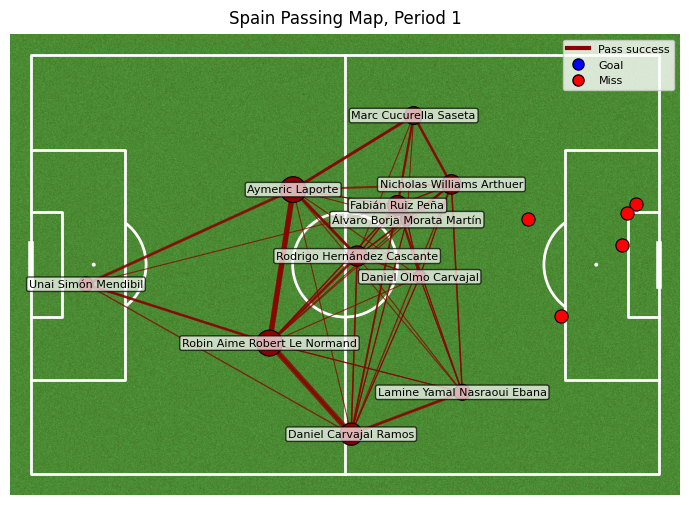

<Figure size 640x480 with 0 Axes>

In [16]:
TEAM_NAME = 'Spain'
TEAM_COLOR = 'darkred' #darked or white

# --- 데이터 전처리 ---
df = fp.copy()

# 좌표와 id만 숫자로, outcome들은 문자열 그대로 두기
num_cols = ['x','y','pass_end_x','pass_end_y','player_id','pass_recipient_id','period']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 성공 패스만, StatsBomb에서는 pass_outcome이 NaN이면 성공
team_passes = (
    df[(df['team'] == TEAM_NAME)
       & (df['type'] == 'Pass')
       & (df['pass_outcome'].isna())]
    .dropna(subset=['x','y','pass_end_x','pass_end_y','player_id','pass_recipient_id'])
)

# 슛, 골 표기, shot_outcome으로 골 판단
team_shots = df[(df['team'] == TEAM_NAME) & (df['type'] == 'Shot')].copy()
team_shots['sx'] = team_shots['x']
team_shots['sy'] = team_shots['y']

id_to_name = (df[['player_id','player']].dropna()
              .drop_duplicates('player_id')
              .set_index('player_id')['player'].to_dict())

def make_network(team_df, min_edge_count=1):
    # 엣지, 패스 송수신 쌍과 횟수
    edges = (team_df
             .dropna(subset=['player_id','pass_recipient_id'])
             .groupby(['player_id','pass_recipient_id']).size()
             .reset_index(name='count'))
    edges = edges[edges['count'] >= min_edge_count].copy()

    # 노드, 평균 위치
    out_pos = (team_df.groupby('player_id')[['x','y']]
               .mean().rename(columns={'x':'x_out','y':'y_out'}))
    in_pos  = (team_df.groupby('pass_recipient_id')[['pass_end_x','pass_end_y']]
               .mean().rename(columns={'pass_end_x':'x_in','pass_end_y':'y_in'}))

    node_ids = pd.Index(out_pos.index).union(pd.Index(in_pos.index))
    nodes = (pd.DataFrame(index=node_ids)
             .join(out_pos, how='left')
             .join(in_pos, how='left'))
    nodes['x'] = nodes[['x_out','x_in']].mean(axis=1, skipna=True)
    nodes['y'] = nodes[['y_out','y_in']].mean(axis=1, skipna=True)

    sent = team_df.groupby('player_id').size().rename('sent')
    recv = team_df.groupby('pass_recipient_id').size().rename('received')
    nodes = nodes.join(sent, how='left').join(recv, how='left')
    nodes[['sent','received']] = nodes[['sent','received']].fillna(0)
    nodes['count'] = nodes['sent'] + nodes['received']

    nodes['name'] = nodes.index.map(lambda pid: id_to_name.get(pid, str(int(pid)) if pd.notna(pid) else 'NA'))
    nodes = nodes.dropna(subset=['x','y'])
    return nodes, edges

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(ncols=1, nrows=1, figsize=(7, 6.5))
fig.subplots_adjust(top=0.85)

period = 1
half_passes = team_passes[team_passes['period'] == period]
nodes, edges = make_network(half_passes, min_edge_count=1)

# 패스 라인
if not edges.empty and not nodes.empty:
    edges = edges.merge(nodes[['x','y']], left_on='player_id', right_index=True)
    edges = edges.merge(nodes[['x','y']], left_on='pass_recipient_id', right_index=True, suffixes=('_sx','_rx'))
    maxc = edges['count'].max()
    lw_scale = (4.0/maxc) if maxc and maxc > 0 else 1.5
    for _, r in edges.iterrows():
        pitch.lines(r['x_sx'], r['y_sx'], r['x_rx'], r['y_rx'],
                    ax=ax, lw=max(0.8, r['count']*lw_scale),
                    alpha=0.75, color=TEAM_COLOR, zorder=3)

# 노드
if not nodes.empty:
    maxn = nodes['count'].max()
    size_scale = (350/maxn) if maxn and maxn > 0 else 120
    pitch.scatter(nodes['x'], nodes['y'],
                  s=np.clip(nodes['count']*size_scale, 80, 800),
                  ax=ax, color=TEAM_COLOR, edgecolors='black', linewidth=0.8, zorder=4)
    for _, r in nodes.iterrows():
        ax.text(r['x'], r['y'], r['name'], fontsize=8, ha='center', va='center',
                color='black',
                bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'),
                zorder=5)

# 슛, 골 표기, shot_outcome으로 구분
hs = team_shots[team_shots['period'] == period]
if not hs.empty:
    g = hs[hs['shot_outcome'] == 'Goal']
    if not g.empty:
        pitch.scatter(g['sx'], g['sy'], s=90, ax=ax, color='blue',
                      edgecolors='black', linewidth=0.8, marker='o', zorder=6)
    m = hs[hs['shot_outcome'] != 'Goal']
    if not m.empty:
        pitch.scatter(m['sx'], m['sy'], s=90, ax=ax, color='red',
                      edgecolors='black', linewidth=0.8, marker='o', zorder=6)

# 범례와 제목
pass_proxy = Line2D([0],[0], color=TEAM_COLOR, lw=3, label='Pass success')
goal_proxy = Line2D([0],[0], marker='o', color='blue', lw=0, markersize=8,
                    markerfacecolor='blue', markeredgecolor='black', label='Goal')
miss_proxy = Line2D([0],[0], marker='o', color='red', lw=0, markersize=8,
                    markerfacecolor='red', markeredgecolor='black', label='Miss')
ax.legend(handles=[pass_proxy, goal_proxy, miss_proxy], loc='upper right', frameon=True, fontsize=8)
ax.set_title(f"{TEAM_NAME} Passing Map, Period {period}", fontsize=12, pad=8)

plt.show()
plt.savefig(f"England Passing Map {period}", dpi=200, bbox_inches="tight")

#**England‘s Passsing Sucess Rates**

In [17]:
Team = 'England'

passes_in_period = fp[fp['type'] == 'Pass'].copy()
successful_passes_count = passes_in_period['pass_outcome'].isna().sum()
total_passes_count = len(passes_in_period)

if total_passes_count > 0:
    tsr = ((successful_passes_count / total_passes_count) * 100).round(2)
else:
    tsr = None # Handle cases with no passes, e.g., set to None or np.nan

print('---------------------------------------------------------------------')
print(f'{Team} Pass Success Rate Per Team:', tsr, '%')
print('---------------------------------------------------------------------')

# Calculate pass success rate per player
player_passes_df = fp[(fp['type'] == 'Pass') & (fp['team'] == Team )].copy()

# Group by player and calculate successful passes and total passes
pass_stats_per_player = player_passes_df.groupby('player').agg(
    successful_passes=('pass_outcome', lambda x: x.isna().sum()),
    total_passes=('type', 'count')
)

# Calculate success rate per player
pass_stats_per_player['success_rate'] = ((pass_stats_per_player['successful_passes'] / pass_stats_per_player['total_passes']) * 100).round(2)

print(f'{Team} Pass Success Rate Per Player:')
print(pass_stats_per_player.sort_values(by='success_rate', ascending=False).head(20))

---------------------------------------------------------------------
England Pass Success Rate Per Team: 82.64 %
---------------------------------------------------------------------
England Pass Success Rate Per Player:
                 successful_passes  total_passes  success_rate
player                                                        
Marc Guehi                       8             8        100.00
Bukayo Saka                      8             9         88.89
John Stones                     15            18         83.33
Luke Shaw                        9            11         81.82
Kyle Walker                     16            20         80.00
Phil Foden                       8            10         80.00
Kobbie Mainoo                    9            12         75.00
Jordan Pickford                 13            19         68.42
Jude Bellingham                 10            15         66.67
Declan Rice                     11            18         61.11
Harry Kane            

#**Spain‘s Passsing Sucess Rates**

In [18]:
Team = 'Spain'

passes_in_period = fp[fp['type'] == 'Pass'].copy()
successful_passes_count = passes_in_period['pass_outcome'].isna().sum()
total_passes_count = len(passes_in_period)

if total_passes_count > 0:
    tsr = ((successful_passes_count / total_passes_count) * 100).round(2)
else:
    tsr = None # Handle cases with no passes, e.g., set to None or np.nan

print('---------------------------------------------------------------------')
print(f'{Team} Pass Success Rate Per Team:', tsr, '%')
print('---------------------------------------------------------------------')

# Calculate pass success rate per player
player_passes_df = fp[(fp['type'] == 'Pass') & (fp['team'] == Team )].copy()

# Group by player and calculate successful passes and total passes
pass_stats_per_player = player_passes_df.groupby('player').agg(
    successful_passes=('pass_outcome', lambda x: x.isna().sum()),
    total_passes=('type', 'count')
)

# Calculate success rate per player
pass_stats_per_player['success_rate'] = ((pass_stats_per_player['successful_passes'] / pass_stats_per_player['total_passes']) * 100).round(2)

print(f'{Team} Pass Success Rate Per Player:')
print(pass_stats_per_player.sort_values(by='success_rate', ascending=False).head(20))

---------------------------------------------------------------------
Spain Pass Success Rate Per Team: 82.64 %
---------------------------------------------------------------------
Spain Pass Success Rate Per Player:
                              successful_passes  total_passes  success_rate
player                                                                     
Robin Aime Robert Le Normand                 48            49         97.96
Marc Cucurella Saseta                        25            26         96.15
Aymeric Laporte                              48            50         96.00
Unai Simón Mendibil                          17            18         94.44
Rodrigo Hernández Cascante                   29            32         90.62
Daniel Carvajal Ramos                        37            43         86.05
Fabián Ruiz Peña                             24            30         80.00
Nicholas Williams Arthuer                    24            31         77.42
Daniel Olmo Carvajal  

#**England’s Pass Failed Endpoints**

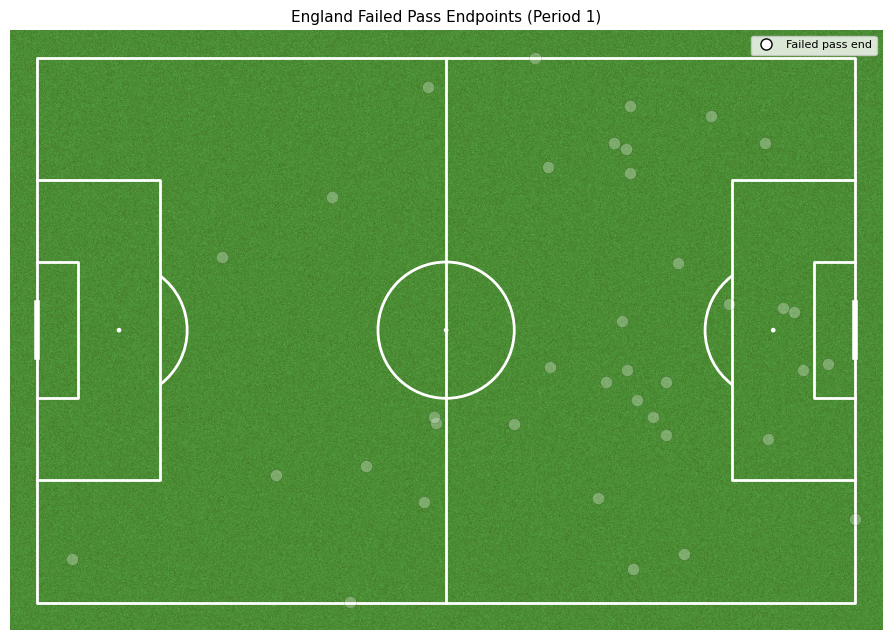

<Figure size 640x480 with 0 Axes>

In [19]:
TEAM_NAME = 'England'
DOT_COLOR = 'white'  # 팀 톤

# 데이터: 실패 패스(Outcome=0)의 종료 지점만 사용
df = fp.copy()
for c in ['pass_end_x','pass_end_y']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

fail = df[(df['team']==TEAM_NAME) & (df['type']=='Pass') & (df['pass_outcome'].notna())]
fail = fail.dropna(subset=['pass_end_x','pass_end_y'])

# 그리기
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(ncols=1, nrows=1, figsize=(13, 6.5))
fig.subplots_adjust(top=0.83, wspace=0.18)

period = 1
dat = fail[fail['period'] == period]
if not dat.empty:
        # 원형 점: 투명도 누적 → 밀집도 직관적
        ax.scatter(dat['pass_end_x'], dat['pass_end_y'],
                   s=75, facecolor=DOT_COLOR, edgecolor='black',
                   linewidths=0.3, alpha=0.28, zorder=4)
    # 간단한 범례(원형 샘플)
dot_proxy = plt.Line2D([0],[0], marker='o', linestyle='',
                           markersize=8, markerfacecolor=DOT_COLOR,
                           markeredgecolor='black', label='Failed pass end')
ax.legend(handles=[dot_proxy], loc='upper right', fontsize=8, frameon=True)
ax.set_title(f"{TEAM_NAME} Failed Pass Endpoints (Period {period})", fontsize=11, pad=6)

plt.show()
plt.savefig(f"{TEAM_NAME} Failed Pass Endpoints {period}", dpi=200, bbox_inches="tight")

#**Spain’s Pass Failed Endpoints**

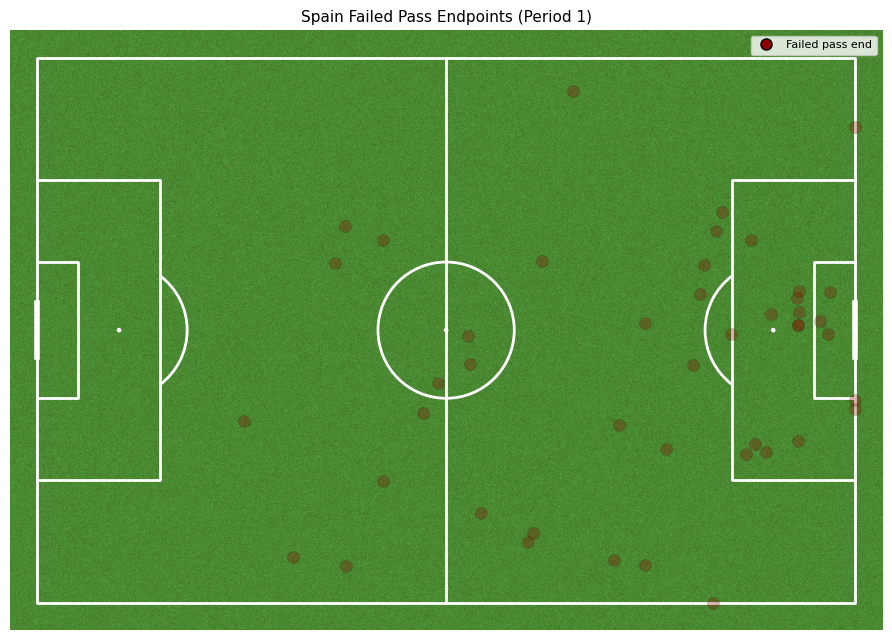

<Figure size 640x480 with 0 Axes>

In [21]:
TEAM_NAME = 'Spain'
DOT_COLOR = 'darkred'  # 팀 톤

# 데이터: 실패 패스(Outcome=0)의 종료 지점만 사용
df = fp.copy()
for c in ['pass_end_x','pass_end_y']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

fail = df[(df['team']==TEAM_NAME) & (df['type']=='Pass') & (df['pass_outcome'].notna())]
fail = fail.dropna(subset=['pass_end_x','pass_end_y'])

# 그리기
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(ncols=1, nrows=1, figsize=(13, 6.5))
fig.subplots_adjust(top=0.83, wspace=0.18)

period = 1
dat = fail[fail['period'] == period]
if not dat.empty:
        # 원형 점: 투명도 누적 → 밀집도 직관적
        ax.scatter(dat['pass_end_x'], dat['pass_end_y'],
                   s=75, facecolor=DOT_COLOR, edgecolor='black',
                   linewidths=0.3, alpha=0.28, zorder=4)
    # 간단한 범례(원형 샘플)
dot_proxy = plt.Line2D([0],[0], marker='o', linestyle='',
                           markersize=8, markerfacecolor=DOT_COLOR,
                           markeredgecolor='black', label='Failed pass end')
ax.legend(handles=[dot_proxy], loc='upper right', fontsize=8, frameon=True)
ax.set_title(f"{TEAM_NAME} Failed Pass Endpoints (Period {period})", fontsize=11, pad=6)

plt.show()
plt.savefig(f"{TEAM_NAME} Failed Pass Endpoints {period}", dpi=200, bbox_inches="tight")

#**Duel Stats**

In [22]:
#선수별 경합 성공률
df = fp.copy()

duel_won_cd = df[df['duel_outcome'].isin(['Won', 'Success In Play', 'Success Out']) | df['clearance_aerial_won'].isin([True])]
duel_won = duel_won_cd.groupby('player').size()
duel_lost_cd = df[df['duel_outcome'].isin(['Lost In Play', 'Lost Out']) | df['duel_type'].isin(['Aerial Lost'])]
duel_lost = duel_lost_cd.groupby('player').size()


# Combine duel_won and duel_lost into a single DataFrame indexed by player
duel_stat = pd.concat([duel_won.rename('Duel Won'), duel_lost.rename('Duel Lost')], axis=1).fillna(0)

duel_stat['Duel Success Rate'] = (duel_stat['Duel Won'] / (duel_stat['Duel Won'] + duel_stat['Duel Lost']) * 100).fillna(0).round(2)
duel_stat = duel_stat.sort_values(by='Duel Success Rate', ascending=False)

# To include team information and filter by team:
# First, get a player-to-team mapping from the original events dataframe
player_team_map = df[['player', 'team']].drop_duplicates(subset=['player']).set_index('player')['team']
# Merge this map with the duel_stat DataFrame
duel_stat = duel_stat.merge(player_team_map, left_index=True, right_index=True, how='left')


print(f'{sel_period} Period Duel Success Rate Per Player:')
print('-------------------------------------------------')
#print(duel_stat.head(30)) # Print top 30 overall

eng_duel_stat = duel_stat[duel_stat['team'] == 'England']
spa_duel_stat = duel_stat[duel_stat['team'] == 'Spain']

print('\nEngland Duel Stats:')
print('-------------------------------------------------')
print(eng_duel_stat)

print('\nSpain Duel Stats:')
print('-------------------------------------------------')
print(spa_duel_stat)

1 Period Duel Success Rate Per Player:
-------------------------------------------------

England Duel Stats:
-------------------------------------------------
                 Duel Won  Duel Lost  Duel Success Rate     team
player                                                          
Kyle Walker           2.0        0.0             100.00  England
Marc Guehi            1.0        0.0             100.00  England
John Stones           2.0        1.0              66.67  England
Jude Bellingham       3.0        4.0              42.86  England
Luke Shaw             1.0        2.0              33.33  England
Bukayo Saka           0.0        2.0               0.00  England
Harry Kane            0.0        4.0               0.00  England
Kobbie Mainoo         0.0        2.0               0.00  England
Phil Foden            0.0        1.0               0.00  England

Spain Duel Stats:
-------------------------------------------------
                              Duel Won  Duel Lost  Duel 

#**Duel Success Rates**

In [23]:
#duel_won = df[df['duel_outcome'].isin(['Won', 'Success In Play', 'Success Out'])].groupby('team').size()
#duel_lost_cd = df[df['duel_outcome'].isin(['Lost In Play', 'Lost Out']) | df['duel_type'].isin(['Aerial Lost'])]
#duel_lost = duel_lost_cd.groupby('team').size()
#duel_won = df[df['duel_type'].isin(['Tackle'])].groupby('team').size()
#duel_lost = df[df['duel_type'].isin(['Aerial Lost'])].groupby('team').size()
duel_won_cd = df[df['duel_outcome'].isin(['Won', 'Success In Play', 'Success Out']) | df['clearance_aerial_won'].isin([True])]
duel_won = duel_won_cd.groupby('team').size()
duel_lost_cd = df[df['duel_outcome'].isin(['Lost In Play', 'Lost Out']) | df['duel_type'].isin(['Aerial Lost'])]
duel_lost = duel_lost_cd.groupby('team').size()


duel_stat = pd.concat([duel_won, duel_lost], axis=1).fillna(0)
duel_stat.columns = ['Duel Won', 'Duel Lost']

duel_stat['Duel Success Rate'] = (duel_stat['Duel Won'] / (duel_stat['Duel Won'] + duel_stat['Duel Lost']) * 100).fillna(0).round(2)
duel_stat = duel_stat.sort_values(by='Duel Success Rate', ascending=False)

print(f'{sel_period} Period Duel Success Rate Per Team')
print('-------------------------------------------------')
print(duel_stat.head(30))

1 Period Duel Success Rate Per Team
-------------------------------------------------
         Duel Won  Duel Lost  Duel Success Rate
team                                           
Spain           9         11               45.0
England         9         16               36.0


#**Dribble Stats**

In [24]:
df = fp.copy()
dribble_suc = df[df['dribble_outcome'] == 'Complete'].groupby('player').size()
dribble_fail = df[df['dribble_outcome'] == 'Incomplete'].groupby('player').size()
dribble_success_rate = (dribble_suc / (dribble_suc + dribble_fail) * 100).fillna(0).round(2)

dribble_stat = pd.concat([dribble_suc.rename('Dribble Success'), dribble_fail.rename('Dribble Fail'), dribble_success_rate.rename('Dribble Success Rate')], axis=1).fillna(0)

player_index = df[['player', 'team']].drop_duplicates(subset=['player']).set_index('player')['team']
dribble_stat = dribble_stat.merge(player_index, left_index=True, right_index=True, how='left')

dribble_stat  = dribble_stat.sort_values(by='Dribble Success Rate', ascending=False)

eng_dribble_stat = dribble_stat[dribble_stat['team'] == 'England']
spa_dribble_stat = dribble_stat[dribble_stat['team'] == 'Spain']

print(f'{sel_period} Period Dribble Success Rate by Player')
print('-------------------------------------------------------')
print(eng_dribble_stat.head(20))
print('-------------------------------------------------------')
print(spa_dribble_stat.head(20))

1 Period Dribble Success Rate by Player
-------------------------------------------------------
                 Dribble Success  Dribble Fail  Dribble Success Rate     team
player                                                                       
Declan Rice                  1.0           1.0                  50.0  England
Luke Shaw                    1.0           1.0                  50.0  England
Jude Bellingham              1.0           0.0                   0.0  England
Kobbie Mainoo                0.0           1.0                   0.0  England
Phil Foden                   0.0           1.0                   0.0  England
-------------------------------------------------------
                             Dribble Success  Dribble Fail  \
player                                                       
Nicholas Williams Arthuer                1.0           1.0   
Fabián Ruiz Peña                         1.0           0.0   
Lamine Yamal Nasraoui Ebana              0.0          

In [25]:
eng_player = 'Declan Rice'
spa_player = 'Martín Zubimendi Ibáñez'

eng_duel_one = eng_duel_stat.reindex([eng_player]).fillna(0)
spa_duel_one = spa_duel_stat.reindex([spa_player]).fillna(0)

eng_dribble_one = eng_dribble_stat.reindex([eng_player]).fillna(0)
spa_dribble_one = spa_dribble_stat.reindex([spa_player]).fillna(0)

eng_stat = eng_duel_one.merge(eng_dribble_one, left_index=True, right_index=True, how='left')
spa_stat = spa_duel_one.merge(spa_dribble_one, left_index=True, right_index=True, how='left')

print('First Period Player Stats Comparison')
print('---------------------------------------------------------------------------')
print(f'{eng_player} Stats:')
print(eng_stat)
print('---------------------------------------------------------------------------')
print(f'{spa_player} Stats:')
print(spa_stat)
print('---------------------------------------------------------------------------')

First Period Player Stats Comparison
---------------------------------------------------------------------------
Declan Rice Stats:
             Duel Won  Duel Lost  Duel Success Rate  team_x  Dribble Success  \
player                                                                         
Declan Rice       0.0        0.0                0.0       0              1.0   

             Dribble Fail  Dribble Success Rate   team_y  
player                                                    
Declan Rice           1.0                  50.0  England  
---------------------------------------------------------------------------
Martín Zubimendi Ibáñez Stats:
                         Duel Won  Duel Lost  Duel Success Rate  team_x  \
player                                                                    
Martín Zubimendi Ibáñez       0.0        0.0                0.0       0   

                         Dribble Success  Dribble Fail  Dribble Success Rate  \
player                               

/tmp/ipython-input-1330070284.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eng_duel_one = eng_duel_stat.reindex([eng_player]).fillna(0)
/tmp/ipython-input-1330070284.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spa_duel_one = spa_duel_stat.reindex([spa_player]).fillna(0)
/tmp/ipython-input-1330070284.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [26]:
#from google.colab import drive
#drive.mount('/content/drive')

In [27]:
#!jupyter nbconvert --to markdown "/content/drive/MyDrive/Colab Notebooks/Euro_2024_Final.ipynb"